- **rlnFourierShellCorrelationCorrected** = Final FSC value: i.e. after correction based on masking of randomized-phases maps
- **rlnFourierShellCorrelationParticleMaskFraction** = CisTEM-like correction of unmasked FSCs, based on fraction of white pixels in solvent mask
- **rlnFourierShellCorrelationUnmaskedMaps** = FSC value before masking of the original maps
- **rlnFourierShellCorrelationMaskedMaps** = FSC value after masking of the original maps
- **rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps** = FSC value after masking of the randomized-phases maps

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from fractions import Fraction

import starfile
from color_palette import *

In [2]:
#input_postprocess_star1 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job177/postprocess.star")
#input_postprocess_star2 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job199/postprocess.star")
#input_postprocess_star3 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job208/postprocess.star")
input_postprocess_star1 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job333/postprocess.star")
input_postprocess_star2 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job293/postprocess.star")
#input_postprocess_star3 = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job263/postprocess.star")
inputs = [input_postprocess_star1, input_postprocess_star2]#, input_postprocess_star3]

/tmp/ipykernel_2462087/3995382604.py:131: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(font_size)
/tmp/ipykernel_2462087/3995382604.py:158: RuntimeWarning: divide by zero encountered in double_scalars
  xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]
/tmp/ipykernel_2462087/3995382604.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


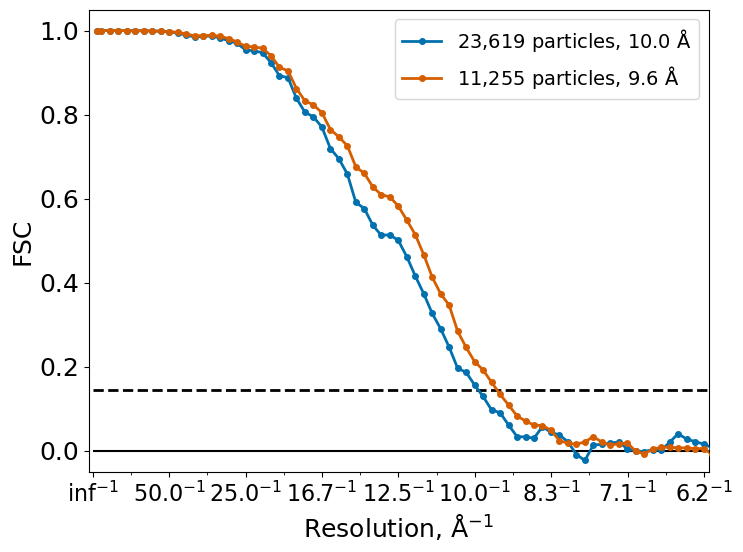

In [3]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(100)

data = [starfile.read(input_postprocess_star) for input_postprocess_star in inputs] 
fsc_data = [None] * len(data)
general_data = [None] * len(data)
x_data = [None] * len(data)
y_data_list = [None] * len(data)
final_resolution = [None] * len(data)
randomise_from = [None] * len(data)

for i in range(len(data)):
    fsc_data[i] = data[i]["fsc"][[
        "rlnResolution",
        "rlnFourierShellCorrelationCorrected",
        "rlnFourierShellCorrelationUnmaskedMaps",
        "rlnFourierShellCorrelationMaskedMaps",
        "rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"
    ]]
    general_data[i] = data[i]["general"]
    final_resolution[i] = general_data[i]["rlnFinalResolution"].values[0]
#print(f"Final resolution: {final_resolution:.2f} Å")
    randomise_from = general_data[i]["rlnRandomiseFrom"].values[0]
#print(f"Randomise from: {randomise_from:.2f} Å")

#binning = 1
#fsc_data["rlnResolution"] = fsc_data["rlnResolution"].copy() * binning
    fsc_data[i].set_index("rlnResolution", inplace=True)
    x_data[i] = fsc_data[i].index

    y_data_list[i]= [
        fsc_data[i]["rlnFourierShellCorrelationCorrected"],
    #    fsc_data["rlnFourierShellCorrelationParticleMaskFraction"],
        fsc_data[i]["rlnFourierShellCorrelationUnmaskedMaps"],
        fsc_data[i]["rlnFourierShellCorrelationMaskedMaps"],
        fsc_data[i]["rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"],
    ]


low_alpha = 0.15
linestyle = "-"
linewidth = 2
markerstyle = "."
markersize = 8

#labels = ["Pre-CTF", "Refined bin4", "Refined bin2"]#["Pre-CTF, N=43996", "Refined bin4, 43996", "Refined bin2, 15011"]
labels = ["23,619 particles", "11,255 particles", "#3"]
colors = ["black", "red", "blue"]
for i in range(len(data)):
    ax.plot(x_data[i], y_data_list[i][0], 
            label=labels[i] + f", {final_resolution[i]:.1f}"+r" $\mathrm{\AA}$",
            color=color_palette()[i],
            alpha=1.0,
            ls=linestyle,
            linewidth=linewidth,
            marker=markerstyle,
            markersize=markersize,
            zorder=10,
            )
# ax.plot(x_data, y_data_list[2], 
#         label="Masked",
#         color=color_palette()[0],
#         alpha=1,
#         ls=linestyle,
#         linewidth=linewidth,
#         marker=markerstyle,
#         markersize=markersize,
#         zorder=8,
#         )

# ax.plot(x_data, y_data_list[3], 
#         label="Noise-substituted",#"Masked, Phase-randomized",
#         color=color_palette()[1],
#         alpha=1.0,
#         ls=linestyle,
#         linewidth=linewidth,
#         marker=markerstyle,
#         markersize=markersize,
#         zorder=9,
#         )


# ax.plot(x_data, y_data_list[1], 
#        label="Unmasked",
#        color=color_palette()[3],
#        alpha=1,
#        ls=linestyle,
#        linewidth=linewidth,
#        marker=markerstyle,
#        markersize=markersize,
#        zorder=7,
#        )

#ax.plot(x_data, y_data_list[1], 
#        label="rlnFourierShellCorrelationParticleMaskFraction",
#        linestyle="dashed",
#        linewidth=linewidth,
#        #color="black",
#        )

alpha = 0.25
#resolution = 1/randomise_from
#start_index = np.where(x_data > resolution)[0][0]
# ax.fill_between(
#     x_data[start_index-1:],
#     y_data_list[2].iloc[start_index-1:],
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[0],
#     alpha=alpha,
# )
# ax.fill_between(
#     x_data[start_index-1:],
#     0,
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[1],
#     alpha=alpha,
# )
ax.set_xlim(
    xmin=-0.001,
    xmax = 1/6.2, #50, 25, 16.7, 12.5, 10.0, 8.3, 7.1, 6.2
    )
ax.set_ylim(
    ymin=-0.05,
    ymax=1.05,
    )   
# change x tick font size
font_size = 16
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)


#ax.scatter(1/final_resolution, 0.143, marker="x", color="black", alpha=alpha)
ax.hlines(0, 0, 1, colors="k", linestyles="-", alpha=1)
ax.hlines(0.143, 0, 1, colors="k", linestyles="--", linewidth=2, alpha=1)#alpha)


# for i in range(len(data)):
#     ax.annotate(xy=(1/final_resolution[i]+0.0012, 0.2), text=rf"{final_resolution[i]:.1f}"+r" $\mathrm{\AA}$", alpha=1)
# draw arrow to final resolution and specify the tail length
# ax.annotate(
#     "",
#     xy=(1/final_resolution+0.004, 0.38),
#     xytext=(1/final_resolution+0.0003, 0.2),
#     arrowprops=dict(arrowstyle="<-", color="black", alpha=1, linewidth=2),
# )

ax.set_xlabel(r"Resolution, $\mathrm{\AA}^{-1}$")
ax.set_ylabel("FSC")

ax.xaxis.set_major_locator(MultipleLocator(0.02))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

# grab the labeled x ticks and print them
xticks = ax.get_xticks()
xticks = np.round(xticks, 2)
xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]

ax.set_xticklabels(xticks)



plt.legend(fontsize=14)
plt.savefig("/home/michalakdj/working/fsc.png", dpi=300, bbox_inches="tight")

In [4]:

input_postprocess_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job293/postprocess.star")

Final resolution: 9.58 Å
Randomise from: 20.47 Å


/tmp/ipykernel_2462087/2506355333.py:121: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(font_size)
/tmp/ipykernel_2462087/2506355333.py:147: RuntimeWarning: divide by zero encountered in double_scalars
  xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]
/tmp/ipykernel_2462087/2506355333.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


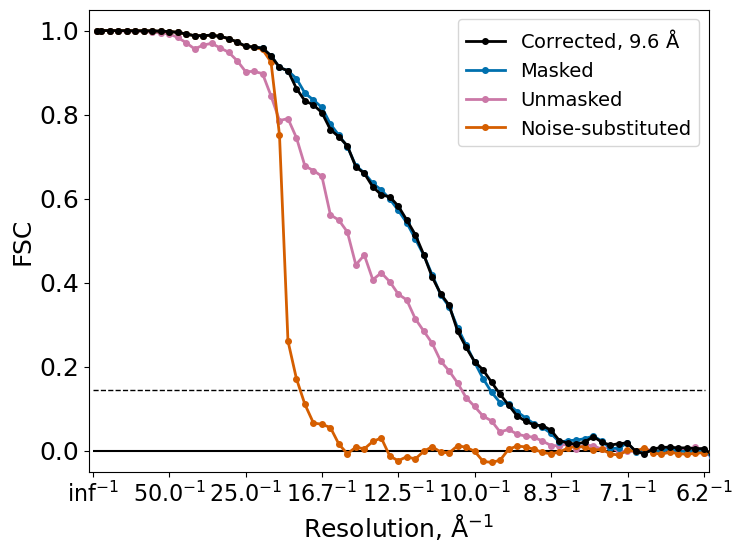

In [6]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(100)

data = starfile.read(input_postprocess_star)
fsc_data = data["fsc"][[
    "rlnResolution",
    "rlnFourierShellCorrelationCorrected",
    "rlnFourierShellCorrelationUnmaskedMaps",
    "rlnFourierShellCorrelationMaskedMaps",
    "rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"
]]
general_data = data["general"]
final_resolution = general_data["rlnFinalResolution"].values[0]
print(f"Final resolution: {final_resolution:.2f} Å")
randomise_from = general_data["rlnRandomiseFrom"].values[0]
print(f"Randomise from: {randomise_from:.2f} Å")

#binning = 1
#fsc_data["rlnResolution"] = fsc_data["rlnResolution"].copy() * binning
fsc_data.set_index("rlnResolution", inplace=True)
x_data = fsc_data.index

y_data_list= [
    fsc_data["rlnFourierShellCorrelationCorrected"],
#    fsc_data["rlnFourierShellCorrelationParticleMaskFraction"],
    fsc_data["rlnFourierShellCorrelationUnmaskedMaps"],
    fsc_data["rlnFourierShellCorrelationMaskedMaps"],
    fsc_data["rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"],
]


low_alpha = 0.15
linestyle = "-"
linewidth = 2
markerstyle = "."
markersize = 8

ax.plot(x_data, y_data_list[0], 
        label=f"Corrected, {final_resolution:.1f}"+r" $\mathrm{\AA}$",
        color="k",
        alpha=1.0,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=10,
        )
ax.plot(x_data, y_data_list[2], 
        label="Masked",
        color=color_palette()[0],
        alpha=1,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=8,
        )
ax.plot(x_data, y_data_list[1], 
       label="Unmasked",
       color=color_palette()[3],
       alpha=1,
       ls=linestyle,
       linewidth=linewidth,
       marker=markerstyle,
       markersize=markersize,
       zorder=7,
       )

ax.plot(x_data, y_data_list[3], 
        label="Noise-substituted",#"Masked, Phase-randomized",
        color=color_palette()[1],
        alpha=1.0,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=9,
        )

#ax.plot(x_data, y_data_list[1], 
#        label="rlnFourierShellCorrelationParticleMaskFraction",
#        linestyle="dashed",
#        linewidth=linewidth,
#        #color="black",
#        )

alpha = 0.25
#resolution = 1/randomise_from
#start_index = np.where(x_data > resolution)[0][0]
# ax.fill_between(
#     x_data[start_index-1:],
#     y_data_list[2].iloc[start_index-1:],
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[0],
#     alpha=alpha,
# )
# ax.fill_between(
#     x_data[start_index-1:],
#     0,
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[1],
#     alpha=alpha,
# )
x_min = -0.001
x_max = 1/6.2#50, 25, 16.7, 12.5, 10.0, 8.3, 7.1, 6.2
y_min = -0.05
y_max = 1.05
ax.set_xlim(
    xmin=x_min,
    xmax = x_max,
    )
ax.set_ylim(
    ymin=y_min,
    ymax=y_max,
    )
# change x tick font size
font_size = 16
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)


#ax.scatter(1/final_resolution, 0.143, marker="x", color="black", alpha=alpha)
ax.hlines(0, 0, x_max-0.001, colors="k", linestyles="-", alpha=1)
ax.hlines(0.143, 0, x_max-0.001, colors="k", linestyles="--", linewidth=1, alpha=1)#alpha)


#ax.annotate(xy=(1/final_resolution+0.0025, 0.2), text=rf"{final_resolution:.1f}"+r" $\mathrm{\AA}$", alpha=1)
#draw arrow to final resolution and specify the tail length
# ax.annotate(
#     "",
#     xy=(1/final_resolution+0.004, 0.38),
#     xytext=(1/final_resolution+0.0003, 0.2),
#     arrowprops=dict(arrowstyle="<-", color="black", alpha=1, linewidth=2),
# )

ax.set_xlabel(r"Resolution, $\mathrm{\AA}^{-1}$")
ax.set_ylabel("FSC")

ax.xaxis.set_major_locator(MultipleLocator(0.02))
#ax.xaxis.set_minor_locator(MultipleLocator(0.01))

# grab the labeled x ticks and print them
xticks = ax.get_xticks()
xticks = np.round(xticks, 2)
xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]

ax.set_xticklabels(xticks)



plt.legend(fontsize=14)
plt.savefig("/home/michalakdj/working/fsc.png", dpi=300, bbox_inches="tight")